In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import *

In [40]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [41]:
value_function_employment(model.par, model.par.w, -1 )

10.235204000874496

In [42]:
unemployed_ss(model.par,1)

(0.037947047631260826, -246.12423545352857)

In [43]:
search_effort = solve_search_effort(model.par)
print(np.shape(search_effort))


(2, 35)


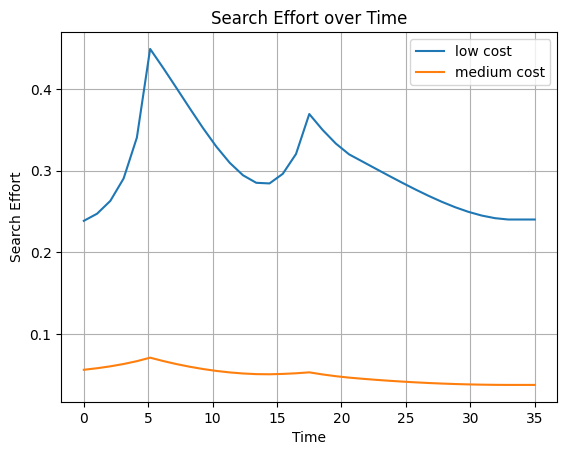

In [44]:

time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort[0,:], label = 'low cost') 
plt.plot(time, search_effort[1,:], label = 'medium cost') 
#plt.plot(time, search_effort[2,:], label = 'high' ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()


In [45]:
sim = sim_search_effort(model.par)

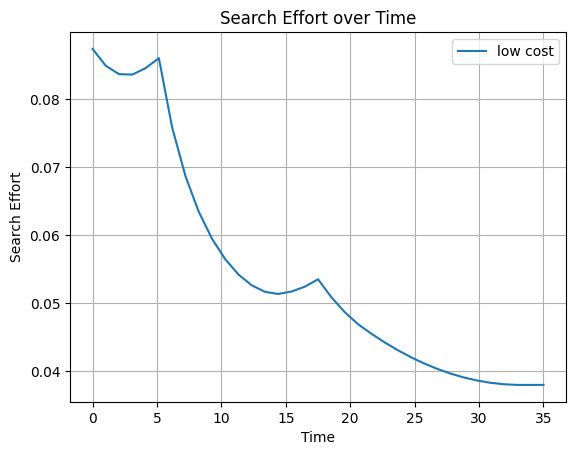

In [46]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, sim, label = 'low cost') 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()


In [47]:
from estimation import *

In [48]:
est_par = ['eta'] # Parameters to estimate
theta0 = [1.0] # Initial guesses

est = method_simulated_moments(model, est_par,theta0)




print(f'Objective:               {est.fun:.4f}')
print(f'rho:                     {est.x[0]:.4f}')
print(f'Number of iterartions:   {est.nit}')


ValueError: The user-provided objective function must return a scalar value.